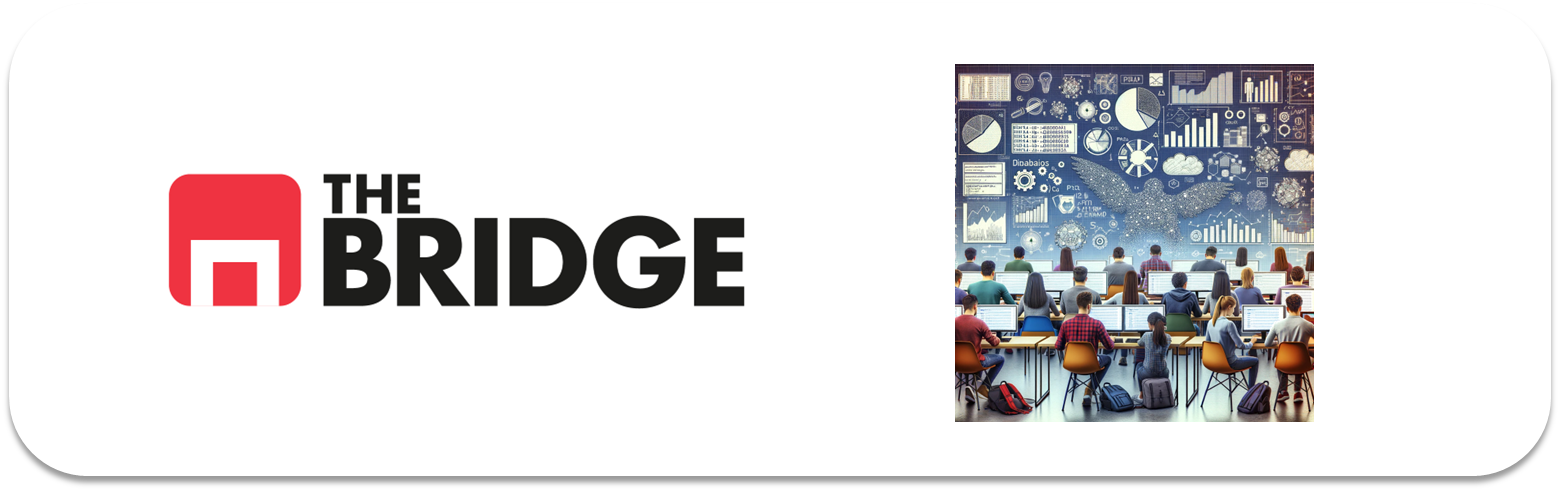

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [2]:
df = pd.read_csv("titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
df.dropna()
df.drop("deck", axis = 1, inplace = True)
df.info()

KeyError: "['deck'] not found in axis"

In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [12]:
df = df.drop(["adult_male", "sex", "embarked", "alive", "alone"], axis = 1 )

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   age          714 non-null    float64
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   class        891 non-null    object 
 7   who          891 non-null    object 
 8   embark_town  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


ValueError: Found input variables with inconsistent numbers of samples: [889, 891]

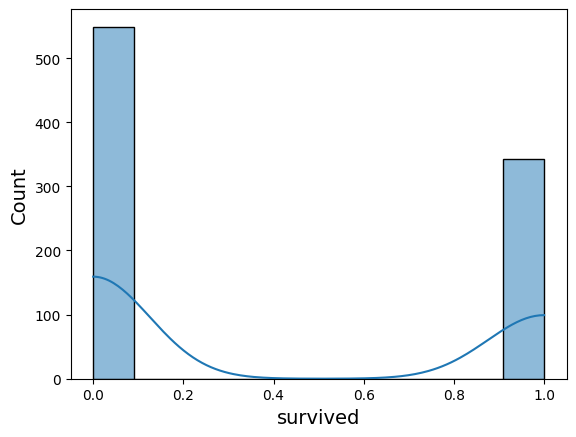

In [22]:
y = df["survived"]
sns.histplot(y, kde= True)
df = df.dropna(subset=['embark_town'])
X = df.drop("survived", axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = df["embark_town"], random_state=42)
#usando stratify nos aseguramos de que haya la misma distribución de ciudades en train que en test


In [24]:
X = df.drop("survived", axis=1)
y = df["survived"]

# Stratify solo en las filas SIN nulos en embarked
stratify_col = df["embark_town"].fillna("Missing")  # Rellena nulos temporalmente

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=stratify_col  # ← Usa la versión sin nulos
)

In [25]:
# Imputar nulos en X_train

# Para numéricas: rellenar con la media
medias = X_train.select_dtypes(include=['float64', 'int64']).mean()
X_train[medias.index] = X_train[medias.index].fillna(medias)

# Para categóricas: rellenar con la moda
modas = X_train.select_dtypes(include=['object']).mode().iloc[0]
X_train[modas.index] = X_train[modas.index].fillna(modas)

# Guardar medias y modas para usar en test después
print("Medias guardadas:", medias)
print("Modas guardadas:", modas)

Medias guardadas: pclass     2.340366
age       29.710454
sibsp      0.499297
parch      0.368495
fare      31.646823
dtype: float64
Modas guardadas: class                Third
who                    man
embark_town    Southampton
Name: 0, dtype: object


In [ ]:
##Convertir a numéricas
# Ordinal para class/pclass
X_train['class'] = X_train['class'].map({'First': 1, 'Second': 2, 'Third': 3})

# One-Hot para sex y embarked
X_train = pd.get_dummies(X_train, columns=['who', 'embark_town'], drop_first=True)




KeyError: "None of [Index(['who', 'embark_town'], dtype='object')] are in the [columns]"

In [31]:
# Ver las nuevas columnas creadas
print(X_train.columns)

# Ver las primeras filas
print(X_train.head())

# Ver distribución de las columnas one-hot (cuántos 1s y 0s)
print(X_train.describe())

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'class', 'who_man',
       'who_woman', 'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')
     pclass        age  sibsp  parch    fare  class  who_man  who_woman  \
46        3  29.710454      1      0  15.500    NaN     True      False   
230       1  35.000000      1      0  83.475    NaN    False       True   
657       3  32.000000      1      1  15.500    NaN    False       True   
888       3  29.710454      1      2  23.450    NaN    False       True   
809       1  33.000000      1      0  53.100    NaN    False       True   

     embark_town_Queenstown  embark_town_Southampton  
46                     True                    False  
230                   False                     True  
657                    True                    False  
888                   False                     True  
809                   False                     True  
           pclass         age       sibsp       parch

In [35]:
# 1. Cargar
df = pd.read_csv("titanic.csv")

# 2. Drop columnas inútiles DEL DF ORIGINAL
df = df.drop(['deck', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], axis=1)

# 3. X e y
X = df.drop('survived', axis=1)
y = df['survived']

# 4. Split (SIN get_dummies todavía)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
    stratify=X['embarked'].fillna('Missing')
)

# 5. Imputar EN X_train
medias = X_train.select_dtypes(include=['number']).mean()
X_train = X_train.fillna(medias)

modas = X_train.select_dtypes(include=['object']).mode().iloc[0]
X_train = X_train.fillna(modas)

# 6. Conversión personalizada
# Sex
X_train['sex'] = X_train['sex'].map({'male': 1, 'female': 0})

# Embarked
X_train['embarked'] = X_train['embarked'].map({'S': 1, 'C': 2, 'Q': 3})

# Class
X_train['class'] = X_train['class'].map({'First': 1, 'Second': 2, 'Third': 3})

# Y lo mismo con X_test cuando lo proceses

print(X_train.head())
print(X_train.isnull().sum())


     pclass  sex   age  sibsp  parch     fare  embarked  class
503       3    0  37.0      0      0   9.5875         1      3
621       1    1  42.0      1      0  52.5542         1      1
751       3    1   6.0      0      1  12.4750         1      3
276       3    0  45.0      0      0   7.7500         1      3
219       2    1  30.0      0      0  10.5000         1      2
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
dtype: int64


In [36]:
X_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class'], dtype='object')

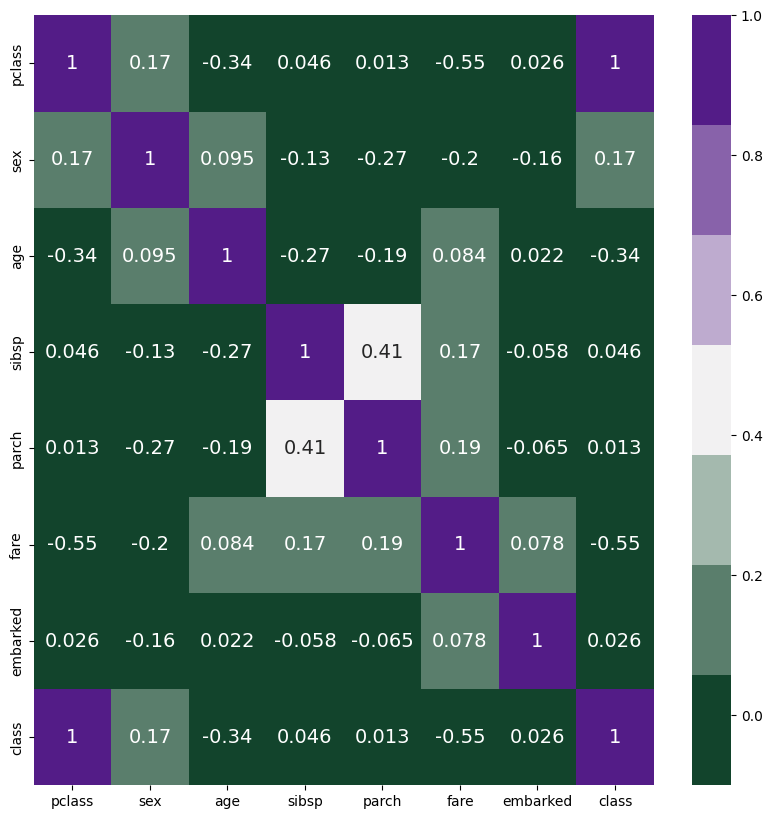

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

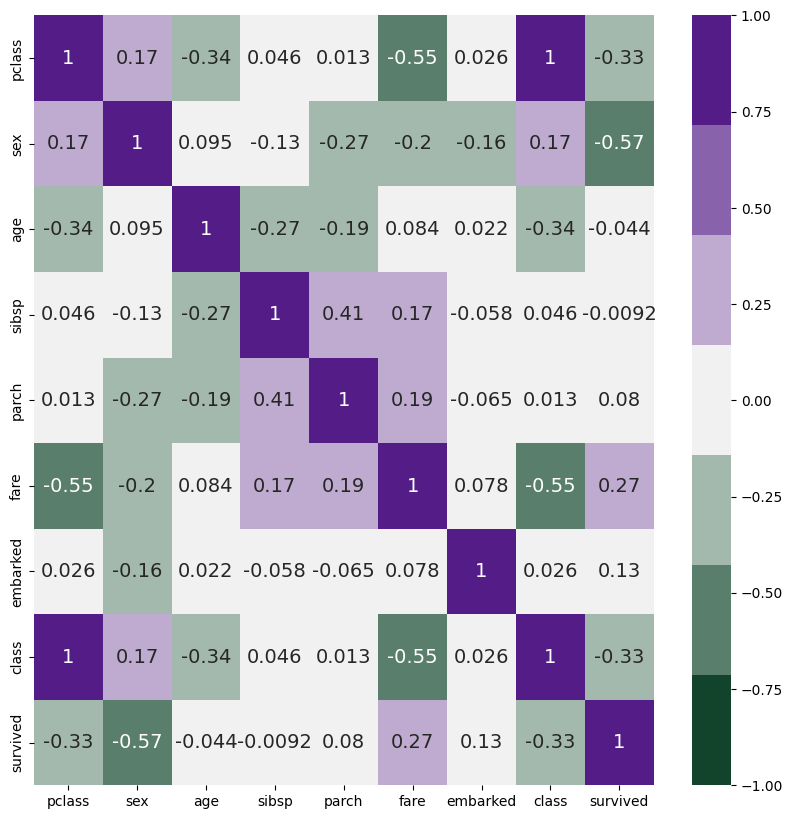

In [41]:
# Crear DataFrame temporal con X_train + y_train
df_temp = X_train.copy()
df_temp['survived'] = y_train.values  # Añadir el target

# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_temp.corr(),
           vmin=-1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True)
plt.show()

In [42]:
X_train = X_train.drop(['age', 'sibsp', 'parch'], axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_37020\1181066230.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train.hist(ax=axs[0], bins=50)


Text(0.5, 1.0, 'ANTES de transformar')

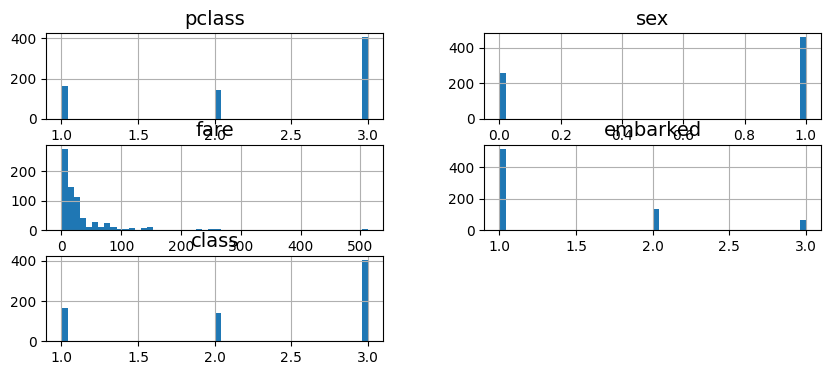

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
X_train.hist(ax=axs[0], bins=50)
axs[0].set_xlabel("Total rooms (original)")
axs[0].set_ylabel("Frequency")
axs[0].set_title("ANTES de transformar")


Text(0.5, 1.0, 'Después de transformar')

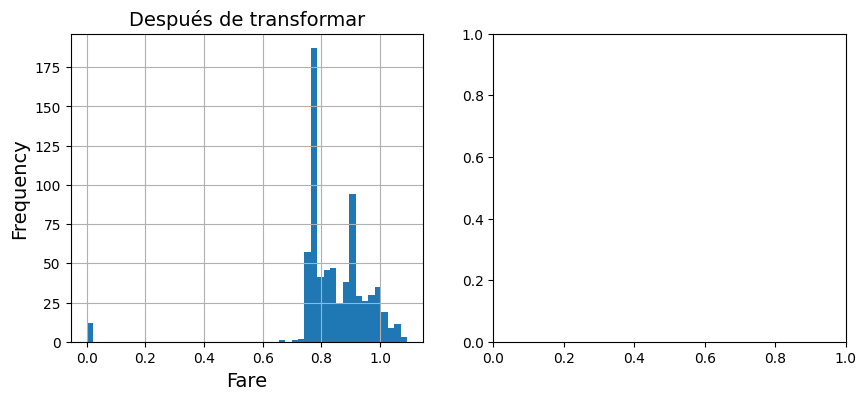

In [48]:
X_train["fare"] = np.log1p(X_train["fare"])
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
X_train["fare"].hist(ax=axs[0], bins=50)
axs[0].set_xlabel("Fare")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Después de transformar")



In [49]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000) 
clf.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [50]:
# 1. Imputar con medias/modas de TRAIN (que guardaste)
X_test = X_test.fillna(medias)
X_test = X_test.fillna(modas)

# 2. Mapear categóricas (igual que train)
X_test['sex'] = X_test['sex'].map({'male': 1, 'female': 0})
X_test['embarked'] = X_test['embarked'].map({'S': 1, 'C': 2, 'Q': 3})
X_test['class'] = X_test['class'].map({'First': 1, 'Second': 2, 'Third': 3})

# 3. Eliminar columnas
X_test = X_test.drop(['age', 'sibsp', 'parch'], axis=1)

# 4. Transformar fare
X_test["fare"] = np.log1p(X_test["fare"])

Matriz de Confusión:
[[375  64]
 [ 81 192]]


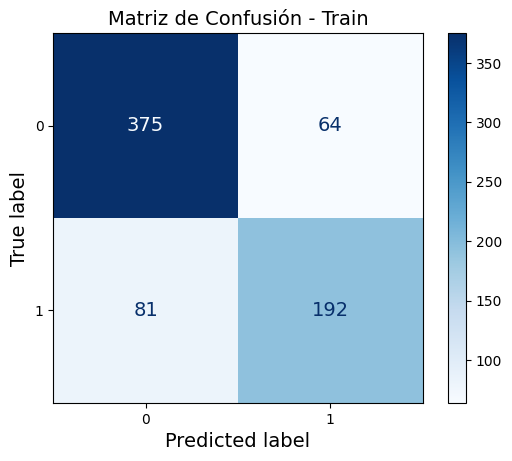


Informe de Clasificación:
              precision    recall  f1-score   support

        Died       0.82      0.85      0.84       439
    Survived       0.75      0.70      0.73       273

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.79      0.80      0.80       712



In [53]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
# 1. HACER PREDICCIONES EN TRAIN
y_pred_train = clf.predict(X_train)

# 2. MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_train, y_pred_train)
print("Matriz de Confusión:")
print(cm)

# Visualizar
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Train')
plt.show()

# 3. CLASSIFICATION REPORT
print("\nInforme de Clasificación:")
print(classification_report(y_train, y_pred_train, target_names=["Died","Survived"]))


Matriz de Confusión:
[[72 38]
 [11 58]]


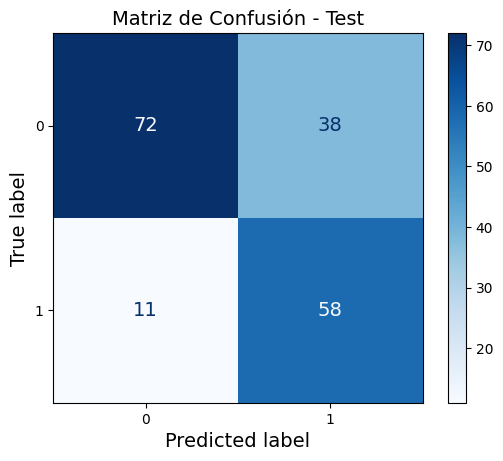


Informe de Clasificación:
              precision    recall  f1-score   support

        Died       0.87      0.65      0.75       110
    Survived       0.60      0.84      0.70        69

    accuracy                           0.73       179
   macro avg       0.74      0.75      0.72       179
weighted avg       0.77      0.73      0.73       179



In [54]:
# 1. HACER PREDICCIONES EN TEST
y_pred_test = clf.predict(X_test)

# 2. MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_test, y_pred_test)
print("Matriz de Confusión:")
print(cm)

# Visualizar
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Test')
plt.show()

# 3. CLASSIFICATION REPORT
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_test, target_names=["Died","Survived"]))